# HDS5210 - 2024 - Final Project


# Problem Statement

The third chapter focuses on the California Department of Public Health conducting an empirical study to determine correlation between count-wise prevalence of the condition and its mortality rates so as to facilitate better distribution of scarce resources. Using the information on asthma deaths and prevalence rates of asthma in the current population of 2014-2016, this paper identified trends and relationships that may help tailor intervention and prevention efforts. Some of the problems are, for instance, determining the counties with higher death rates in comparison with counties with high prevalence rates, examining geographical and demographic effects on asthma, and analysis of risk assessment models.

The analysis utilizes two primary datasets from the California Health and Human Services Agency (CHHS): The data sets used in our study are the Asthma Deaths by County (2014-2016) and the CHIS Data- Current Asthma Prevalence by County (2015-2016) datasets. The datasets offer detailed information of asthma mortality and prevalence in those California counties for different age groupings and the number of deaths with the corresponding age-adjusted mortality rates and current prevalence percent with confidence intervals. These available datasets collectively allow for a comprehensive analysis of asthma burden at the geographic regions at the state level.

# Dataset 1 - Asthma Deaths by County
Source -  https://data.chhs.ca.gov/dataset/asthma-deaths-by-county

The data set employed for this study was obtained from the California Health and Human Services Agency California Community Health Statistics, and includes data on Asthma mortality in California by County for the period between 2014 and 2016. It has some of the basic parameters such as simple counts and standardized mortality ratios comparing the counties. The dataset provides numbers of deaths while asthma is ascertained as the cause. The data is then agglomerated to capture the whole population for all age groups to give a detailed description of asthma effect to mortality across the whole of California. The data matrices present basic demographic characteristics for each county, including death counts and age-adjusted mortality rates; some of the entries are followed by an “S” where the statistical rates are based on small numbers that are too imprecise to provide meaningful rates. This information is important for Central Texas to know on geographic distribution of deaths due to asthma and areas of risk concentrations.

# Dataset 2 - CHIS Data-Current Asthma Prevalence by County
Source - https://data.chhs.ca.gov/dataset/asthma-prevalence/resource/a440b99b-ccc6-473c-bea1-2baf36b05dbe


This dataset, from CHHS, includes CHIS results about the prevalence of asthma within California counties in the time period of 2015-2016. It gives the current asthma prevalence percentages for each county with 95% confidence interval s which give information on the accuracy of the estimated rates. The employment data is aggregate, which includes all age groups, while the resulting numbers provide information on the shares of residents currently suffering from asthma in each county. A feature of this dataset is that small counties may be combined together in order to obtain statistically valid results. Certain estimates are depicted statistically as unstable with relevant warnings for analysis. The dataset plays an essential role in the identification of the geographic distribution of asthma among different regions in California.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load the JSON file
with open("/content/Asthma Deaths by County.json", "r") as file:
    data = json.load(file)

# Extract column names from `fields`
columns = [field['id'] for field in data['fields']]

# Extract data from `records`
records = data['records']

# Convert to DataFrame
df = pd.DataFrame(records, columns=columns)

# Display the DataFrame
print(df.head())


   _id      COUNTY      YEARS            STRATA AGE GROUP NUMBER OF DEATHS  \
0    1  California  2014–2016  Total population  All ages            1,181   
1    2     Alameda  2014–2016  Total population  All ages               58   
2    3      Alpine  2014–2016  Total population  All ages                0   
3    4      Amador  2014–2016  Total population  All ages                0   
4    5       Butte  2014–2016  Total population  All ages                7   

  AGE-ADJUSTED MORTALITY RATE  \
0                         9.6   
1                        11.2   
2                           0   
3                           0   
4                        None   

                                             COMMENT  
0                                               None  
1                                               None  
2                                               None  
3                                               None  
4  Rate not available due to statistical instability  


In [100]:
df_2 = pd.read_csv("/content/CHIS Data-Current Asthma Prevalence by County.csv")
df_2.head()

,_id,COUNTY,YEARS,STRATA,AGE GROUP,CURRENT PREVALENCE,95% CONFIDENCE INTERVAL,COUNTIES GROUPED,COMMENT
0,1,California,2015–2016,Total population,All ages,8.7,(8.1–9.3),NaN,NaN
1,2,Alameda,2015–2016,Total population,All ages,9.1,(5.9–12.2),NaN,NaN
2,3,Alpine,2015–2016,Total population,All ages,9.3,(4.1–14.6),"Alpine, Amador, Calaveras, Inyo, Mariposa, Mon...",NaN
3,4,Amador,2015–2016,Total population,All ages,9.3,(4.1–14.6),"Alpine, Amador, Calaveras, Inyo, Mariposa, Mon...",NaN
4,5,Butte,2015–2016,Total population,All ages,9.4,(3.8–15.1),NaN,Estimate is statistically unstable. Caution is...


# Cleaning and First Join

The data cleaning process began with handling two key numerical variables in the deaths dataset: On the other hand, the two comparative indicators labelled as “NUMBER OF DEATHS” and “AGE-ADJUSTED MORTALITY RATE”. To perform data cleaning, Commas were stripped off the numeric values and None turned to float and NaN. When the missing values for the deaths dataset were checked, it was mean that “NUMBER OF DEATHS” had 174 missing values and “AGE-ADJUSTED MORTALITY RATE” 226 had missing values, finally, “COMMENT” had 305 missing values.

In the prevalence dataset, as with the raw dataset, the “CURRENT PREVALENCE” field contained string values that accurately represented a number or percentage of prevalence with some errors, thus, it was converted to numeric values with error handling to ensure appropriate conversion. This dataset contained many missing data – 585 missing values in each of “CURRENT PREVALENCE” and “95% CONFIDENCE INTERVAL” columns. The field with the most missing values was the “COUNTIES GROUPED” with 1,176 missing values followed by the “COMMENT” field with 657.

As observed from the sample output, when the datasets were combined with the help of the key field “COUNTY”, the data was unique from both the sources. This merged data list contains disaggregate data which encompass death, mortality and prevalence data by categories of age, and population strata. For example, the deaths records from California revealed 1,181 total and 9.6 age-adjusted mortality rate, 8.7% current prevalence rate with a confidence interval of (8.1-9.3). Further, based on the age, it is classified as age 0 to 17 years comprising 10.1% cases and age 18 years and over comprising 8.3% cases.

In [101]:
def clean_numeric_data(df, column):
    """
    Cleans numeric data by removing commas and converting to float
    """
    df = df.copy()
    df[column] = df[column].astype(str).str.replace(',', '').replace('None', np.nan)
    df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

In [102]:
# Data Cleaning and First Join
# Clean deaths data
df_deaths = df.copy()
df_deaths = clean_numeric_data(df_deaths, 'NUMBER OF DEATHS')
df_deaths = clean_numeric_data(df_deaths, 'AGE-ADJUSTED MORTALITY RATE')

df_deaths.isna().sum()

,0
_id,0
COUNTY,0
YEARS,0
STRATA,0
AGE GROUP,0
NUMBER OF DEATHS,174
AGE-ADJUSTED MORTALITY RATE,226
COMMENT,305


In [103]:
#Clean prevalence data
df_prev = df_2.copy()
df_prev['CURRENT PREVALENCE'] = pd.to_numeric(df_prev['CURRENT PREVALENCE'], errors='coerce')

df_prev.isna().sum()

,0
_id,0
COUNTY,0
YEARS,0
STRATA,0
AGE GROUP,0
CURRENT PREVALENCE,585
95% CONFIDENCE INTERVAL,585
COUNTIES GROUPED,1176
COMMENT,657


In [104]:
#Combine deaths and prevalence
merged_df = pd.merge(
    df_deaths,
    df_prev,
    on=['COUNTY'],
    suffixes=('_deaths', '_prev')
)

merged_df.head()

,_id_deaths,COUNTY,YEARS_deaths,STRATA_deaths,AGE GROUP_deaths,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,COMMENT_deaths,_id_prev,YEARS_prev,STRATA_prev,AGE GROUP_prev,CURRENT PREVALENCE,95% CONFIDENCE INTERVAL,COUNTIES GROUPED,COMMENT_prev
0,1,California,2014–2016,Total population,All ages,1181.0,9.6,None,1,2015–2016,Total population,All ages,8.7,(8.1–9.3),NaN,NaN
1,1,California,2014–2016,Total population,All ages,1181.0,9.6,None,60,2015–2016,Child vs. adult,0–17 years,10.1,(8.3–11.9),NaN,NaN
2,1,California,2014–2016,Total population,All ages,1181.0,9.6,None,119,2015–2016,Child vs. adult,18+ years,8.3,(7.6–9.0),NaN,NaN
3,1,California,2014–2016,Total population,All ages,1181.0,9.6,None,178,2015–2016,Age groups,0–4 years,4.5,(2.5–6.4),NaN,NaN
4,1,California,2014–2016,Total population,All ages,1181.0,9.6,None,237,2015–2016,Age groups,5–17 years,12.3,(9.8–14.8),NaN,NaN


# Joining using Population data

The second step of the process of data integration for the selected counties was a creation of the population data for each of the counties. The problem was encountered because the original datasets did not include direct population numbers, a proxy instead was used which included the total number of death records across the county. This was accomplished by grouping the merged dataset by 'COUNTY' and counting the 'NUMBER OF DEATHS' entries, resulting in a new dataframe called 'county_pop' with two columns: 'COUNTY' and 'POPULATION'.

The last fusion connected this population data with the data achieved via the first fused table (merged_df), joining the objects under the ‘COUNTY’ field. Finally, after joining the two DataFrames the final_dG has all the columns present in deaths and prevalence DataFrame plus the ‘POPULATION’ column. For instance, the sample data on California has shown that each record now contains mortality statistics, prevalence by age and stratum, as well as the computed population proxy of 252.

When examining the final dataset with the first few rows only it is apparent that California has been entered multiple times with almost identical death statistics including number of deaths: 1,181; Age-adjusted mortality rate: 9.6; as but different prevalence rates for some age group populations; under 18 years old: 10.1%; over 18 years old : 8.3%; under 4 years old 4.5% All of these entries retain the same calculated population value and thereby complement the analysis with coherent demographic data.

In [105]:
# Add population data (creating a proxy for demonstration)
county_pop = merged_df.groupby('COUNTY')['NUMBER OF DEATHS'].count().reset_index()
county_pop.columns = ['COUNTY', 'POPULATION']
final_df = pd.merge(merged_df, county_pop, on='COUNTY')

final_df.head()

,_id_deaths,COUNTY,YEARS_deaths,STRATA_deaths,AGE GROUP_deaths,NUMBER OF DEATHS,AGE-ADJUSTED MORTALITY RATE,COMMENT_deaths,_id_prev,YEARS_prev,STRATA_prev,AGE GROUP_prev,CURRENT PREVALENCE,95% CONFIDENCE INTERVAL,COUNTIES GROUPED,COMMENT_prev,POPULATION
0,1,California,2014–2016,Total population,All ages,1181.0,9.6,None,1,2015–2016,Total population,All ages,8.7,(8.1–9.3),NaN,NaN,252
1,1,California,2014–2016,Total population,All ages,1181.0,9.6,None,60,2015–2016,Child vs. adult,0–17 years,10.1,(8.3–11.9),NaN,NaN,252
2,1,California,2014–2016,Total population,All ages,1181.0,9.6,None,119,2015–2016,Child vs. adult,18+ years,8.3,(7.6–9.0),NaN,NaN,252
3,1,California,2014–2016,Total population,All ages,1181.0,9.6,None,178,2015–2016,Age groups,0–4 years,4.5,(2.5–6.4),NaN,NaN,252
4,1,California,2014–2016,Total population,All ages,1181.0,9.6,None,237,2015–2016,Age groups,5–17 years,12.3,(9.8–14.8),NaN,NaN,252


# Aggregation - County level Statistics

The first aggregation process involved combining the data into count level statistics to develop the county level rates; thus converting the detailed age stratified quantities into summary statistics. This was done by rearranging the final dataset by ‘COUNTY’ and applying variety of mean value functions to specific measures. In the calculation of the ‘NUMBER OF DEATHS’, summation was used to arrive at the total deaths of each county thus: Total deaths = Number of deaths Hence ‘CURRENT PREVALENCE’ and ‘AGE-ADJUSTED MORTALITY RATE’ were taken as mean of the overall situation within the county, that is: Mean = (CURRENT PREVALENCE + AGE-ADJUSTED MORTALITY RATE)/2 POPULATION was retained using the ‘first’ function because it did not change within each county and was opposite for GINI.

By going to the first couple of rows of the aggregated output, we can observe a compact summary of the asthma toll in each shire: four figures per shire which sum up the total death toll, average prevalence rate, mean age-adjusted mortality rate, and population in the county. This aggregation step was important in that group component given that the data analysis was complex and divided along stratified lines and hence transforming the data into more analyzable manageable county level metrics was important.

This aggregated dataset serves as the basis for further analysis, which reveals how asthma affects the various counties and intensifies comparisons between the districts’ rates. Another advantage of the present arrangements is that one can readily single out counties with notably high death rates or prevalence rates, which is necessary for guide the public health measures.

In [106]:
# County-level statistics
county_stats = final_df.groupby('COUNTY').agg({
    'NUMBER OF DEATHS': 'sum',
    'CURRENT PREVALENCE': 'mean',
    'AGE-ADJUSTED MORTALITY RATE': 'mean',
    'POPULATION': 'first'
}).reset_index()

county_stats.head()

,COUNTY,NUMBER OF DEATHS,CURRENT PREVALENCE,AGE-ADJUSTED MORTALITY RATE,POPULATION
0,Alameda,10892.0,9.254545,10.2125,224
1,Alpine,0.0,12.511111,0.0000,252
2,Amador,0.0,12.511111,0.0000,140
3,Butte,392.0,12.878947,0.0000,112
4,Calaveras,0.0,12.511111,0.0000,84


# Regional Statistics

The second aggregation phase focused on creating a broader regional analysis by dividing California into two main regions: Southern and Northern. A new column called ‘Region’ was created on the county_stats dataset, where three counties of Los Angeles, Orange and San Diego was grouped as ‘Southern California’ while all other counties were grouped under ‘Northern California’. Such geographic categorization allows conjecturing about possible regional distribution of asthma burden.

The resulting regional_stats dataset combines these county level metrics into the two large regions shown below. For each region it comes up with an overall total of the ‘NUMBER OF DEATHS’ for asthma, the ‘CURRENT PREVALENCE’ mean and ‘AGE-ADJUSTED MORTALITY RATE’ mean. All calculated values were rounded off up to the second decimal place for the purpose of clarity. Precisely from the regional view, one can compare any paramount differences of Northern and Southern California concerning asthma outcomes and incidence.

These high-level agglomerations are especially useful for identifying wide geographical trends in asthma rates and for guiding decision making about the distribution of resources at a macro level, such as for policy makers and health system planners. Schematic differences between the regions could show disparities for asthma results due to systematic diverse healthcare access or environmental and population features.

In [107]:
# Second Aggregation: Regional statistics
county_stats['Region'] = np.where(county_stats['COUNTY'].isin(['Los Angeles', 'Orange', 'San Diego']),
                                'Southern', 'Northern')
regional_stats = county_stats.groupby('Region').agg({
    'NUMBER OF DEATHS': 'sum',
    'CURRENT PREVALENCE': 'mean',
    'AGE-ADJUSTED MORTALITY RATE': 'mean'
}).round(2)

regional_stats.head()

,NUMBER OF DEATHS,CURRENT PREVALENCE,AGE-ADJUSTED MORTALITY RATE
Region,,,
Northern,312760.0,10.67,3.85
Southern,72268.0,7.50,7.62


#Calculating death rate per 100,000

The field transformation process started with estimating the standardized death rate per 100000 population for the counties; this is because comparing asthma mortality between counties requires consideration of county size. Analyzing the first few rows of the transformed data confirmed major differences in asthma outcomes at the county level. Alameda County, for example, indicates 108 deaths and a current prevalence rate of 92.0%, which give a death rate of 486 250 per 100,000 population. These observations argue that the high standardized rate is due to the number of deaths and population proxy used in calculation.

A number of counties were identified as having no reported deaths but with prevalence rates around 12.5%: Alpine, Amador, and Calaveras counties had death rates of 0 per 100,000 population. Such a drastic difference with Alameda County implies large spatial variations of asthma mortality. Butte County is in the middle ground with 39 deaths; prevalence at 12.87% and eradicated lives at 350000 per 100000 people.

The transformed dataset holds significant patterns along the asthma burden in California counties. Thus, when the rates of death are compared with prevalence rates and age-adjusted mortality rates, a more accurate picture of asthma effects in each county is obtained. All of these metrics are especially useful if one needs to look for specific issues that might need some specific actions or could possibly need more healthcare assistance.

In [108]:
# Calculate death rate per 100,000
county_stats['Death_Rate_100k'] = (county_stats['NUMBER OF DEATHS'] /
                                  county_stats['POPULATION']) * 100000

county_stats.head()

,COUNTY,NUMBER OF DEATHS,CURRENT PREVALENCE,AGE-ADJUSTED MORTALITY RATE,POPULATION,Region,Death_Rate_100k
0,Alameda,10892.0,9.254545,10.2125,224,Northern,4862500.0
1,Alpine,0.0,12.511111,0.0000,252,Northern,0.0
2,Amador,0.0,12.511111,0.0000,140,Northern,0.0
3,Butte,392.0,12.878947,0.0000,112,Northern,350000.0
4,Calaveras,0.0,12.511111,0.0000,84,Northern,0.0


# Calculating z-score for prevalence

The second field transformation was the z-score transformation of the asthma prevalence rates which make it easier to compare different counties’ prevalence data by indicating how standard deviations different each county’s prevalence rate is from the mean. This statistical transformation helps lend an understanding of which counties have higher or lower prevalence rates than is typical within the distribution of counties in California.

The probabilities give interesting patterns across counties to observe the results. Cowl Solano County is quite different, despite having 108 deaths and a very high death rate of 486,250 per 100,000, its z-score of -0.67 for prevalence is below the state average. Alpine, Amador and Calaveras counties all have positive z-scores of roughly 1.06; this means that prevalence rates (.1251) are higher than those seen typically while these counties have no recorded deaths. From this group Butte County stands out clearly with a z-score of 1.26, which means that its prevalence rate of 12.88% is above the state average considerably.

These standardized scores makes it easier to look at directories, irregularities, and discrepancies in asthma incidence at the county level that are not explicit from apparent prevalence rates . High prevalence does not appear to equate to a high death rate which implies discrepancies in asthma management and Healthcare accessibility in the various counties.

In [109]:
# Calculate z-scores for prevalence
county_stats['Prevalence_ZScore'] = (county_stats['CURRENT PREVALENCE'] -
                                    county_stats['CURRENT PREVALENCE'].mean()) / \
                                    county_stats['CURRENT PREVALENCE'].std()
county_stats.head()

,COUNTY,NUMBER OF DEATHS,CURRENT PREVALENCE,AGE-ADJUSTED MORTALITY RATE,POPULATION,Region,Death_Rate_100k,Prevalence_ZScore
0,Alameda,10892.0,9.254545,10.2125,224,Northern,4862500.0,-0.670261
1,Alpine,0.0,12.511111,0.0000,252,Northern,0.0,1.064960
2,Amador,0.0,12.511111,0.0000,140,Northern,0.0,1.064960
3,Butte,392.0,12.878947,0.0000,112,Northern,350000.0,1.260957
4,Calaveras,0.0,12.511111,0.0000,84,Northern,0.0,1.064960


# Creating Risk Categories

The risk categorization process was done through one function that generates three different risk levels: Low, Medium, and High, however, being cautious when working with counties that had zero mortality, for instance Kajiado County. The function first category all counties into a risk level of ‘Low’, and then reorganises the counties with non-zero death rates into three categories through the use of quantile-based categories which place similar counties together.

Focusing on the first five counties in the categorized dataset we are able to observe differences in risk level. Alameda County is ‘High’ risk based on having 108 deaths and a prevalence rate of 92.0% and 486,250 deaths per 100,000 population in Alameda County. This classification that is supported by current epidemiologic data shows a high burden of asthma disease in this northern California county. However, the overall risk rating of the given performance is measured as ‘Low’ for Alpine, Amador, Calaveras, and Butte counties due to their fluctuating mean prevalence rates. Of course, 39 deaths and a high value of prevalence z-score (1.26) are still typical for a ‘Low risk’ category as compared to, for example, Alameda.

As a measure of risk categorization, this approach presents the simplified but more one with a higher level of interpretability to understand which counties are deserving of more attention or action. The fact that Alameda County was classified as ’High’ while other counties in Northern California were classified as ’Low’ evidence the disparity in asthma outcomes increasing even within the same large region. Health and development decision-makers will also benefit from the put into use of this information in selecting the necessary resources and approaches.

In [110]:
def create_risk_categories(df, value_col):
    """
    Creates risk categories handling zero values and duplicates
    """
    df = df.copy()
    # Handle zero values separately
    df['Risk_Category'] = 'Low'  # Default category

    # For non-zero values, create categories
    non_zero_mask = df[value_col] > 0
    if non_zero_mask.any():
        df.loc[non_zero_mask, 'Risk_Category'] = pd.qcut(
            df.loc[non_zero_mask, value_col],
            q=3,
            labels=['Low', 'Medium', 'High'],
            duplicates='drop'
        )
    return df

In [111]:
county_stats['Risk_Category'] = create_risk_categories(county_stats, 'Death_Rate_100k')['Risk_Category']
county_stats.head()

,COUNTY,NUMBER OF DEATHS,CURRENT PREVALENCE,AGE-ADJUSTED MORTALITY RATE,POPULATION,Region,Death_Rate_100k,Prevalence_ZScore,Risk_Category
0,Alameda,10892.0,9.254545,10.2125,224,Northern,4862500.0,-0.670261,High
1,Alpine,0.0,12.511111,0.0000,252,Northern,0.0,1.064960,Low
2,Amador,0.0,12.511111,0.0000,140,Northern,0.0,1.064960,Low
3,Butte,392.0,12.878947,0.0000,112,Northern,350000.0,1.260957,Low
4,Calaveras,0.0,12.511111,0.0000,84,Northern,0.0,1.064960,Low


# Calculating prevalence to mortality ratio

The novel measure is the combined prevalence-to-mortality rate that establishes the current asthma prevalence to the age-adjusted mortality rate depending on the county, where the missing mortality rates were replaced by the mean value. This ratio in a way alerts us of potential disparity between how frequently asthma is present in a county and how lethal it is useful in comparative analysis of asthma health management and healthcare provision.

If we take the first five counties let’s analyze Alameda, it has a Prev_Mort_Ratio of 0.91 it means that their prevalence rate is slightly low as compare to mortality rate. This relatively narrow coefficient that, however, is quite high (108) and the ‘High’ risk assessment points towards a considerable asthma share that comes with mortality rates proportional to the disease frequency. It clearly shows the epidemiological picture of a disturbing high prevalence rate of 92.0% and mortality rate 9.25 per 100,000 in Alameda.

For Alpine, Amador, Butte and Calaveras, the ratio appears as ‘inf’ (infinite) because no count of deaths has been reported for these counties even if they have elevated prevalence rates ranging about 12.5%. This makes one deduce that even though death due to asthma exists in these communities it may be well controlled or of a different magnitude all together. However, it may also be suggestive of possible under certification of asthma related deaths especially in small counties; or variation in coding and certification of deaths.



In [112]:
# 4. Calculate prevalence to mortality ratio
county_stats['Prev_Mort_Ratio'] = county_stats['CURRENT PREVALENCE'] / \
                                 county_stats['AGE-ADJUSTED MORTALITY RATE'].fillna(county_stats['AGE-ADJUSTED MORTALITY RATE'].mean())

county_stats.head()

,COUNTY,NUMBER OF DEATHS,CURRENT PREVALENCE,AGE-ADJUSTED MORTALITY RATE,POPULATION,Region,Death_Rate_100k,Prevalence_ZScore,Risk_Category,Prev_Mort_Ratio
0,Alameda,10892.0,9.254545,10.2125,224,Northern,4862500.0,-0.670261,High,0.906198
1,Alpine,0.0,12.511111,0.0000,252,Northern,0.0,1.064960,Low,inf
2,Amador,0.0,12.511111,0.0000,140,Northern,0.0,1.064960,Low,inf
3,Butte,392.0,12.878947,0.0000,112,Northern,350000.0,1.260957,Low,inf
4,Calaveras,0.0,12.511111,0.0000,84,Northern,0.0,1.064960,Low,inf


# Creating Composite Risk Score

The last one was aimed at making the composite risk score of two risk factors: the prevalence rates standardized by z-score (Prevalence_ZScore) and normalized death rates. This score was arrived at by weighting the prevalence at 40% and the death rate at 60% to ensure an indication of both the prevalence of asthma and its lethality was recognized in a fair manner.

Looking at the first five counties there are some intriguing findings. Alameda even though has high death estimate and death rate gave a relative low risk factors score (-0.231007) due to low prevalence Z-score( -0.670261). This means even though Alameda has a high mortality sense its risk maybe lower than we think if we factor both the number of cases and mortality rates. Comparing the three graphs of the three counties: Alpine, Amador and Calaveras, all the risk scores are almost equal, with close to 0.425984, since their prevalence z-scores are positive and equal to 1.064960 since they reported no deaths at all. Among the these counties Butte really has the highest risk score of 0.507053 in the group here, this is due to both the high prevalence z-score of 1.260957 and the overall death rate.

This newly developed composite risk score not only takes prevalence into account, but also mortality of asthma; Therefore, the counties which are recognized as suffering high risk of asthma both in prevalence and mortality are identified. Variability in scores indicates that variation in prevalence/mortality ratios can result in difference overall risk ratings which may be useful in development of health care policy and resource allocation.

In [113]:
# Create composite risk score
county_stats['Risk_Score'] = (0.4 * county_stats['Prevalence_ZScore'] +
                             0.6 * (county_stats['Death_Rate_100k'] / county_stats['Death_Rate_100k'].max()))

county_stats.head()

,COUNTY,NUMBER OF DEATHS,CURRENT PREVALENCE,AGE-ADJUSTED MORTALITY RATE,POPULATION,Region,Death_Rate_100k,Prevalence_ZScore,Risk_Category,Prev_Mort_Ratio,Risk_Score
0,Alameda,10892.0,9.254545,10.2125,224,Northern,4862500.0,-0.670261,High,0.906198,-0.231007
1,Alpine,0.0,12.511111,0.0000,252,Northern,0.0,1.064960,Low,inf,0.425984
2,Amador,0.0,12.511111,0.0000,140,Northern,0.0,1.064960,Low,inf,0.425984
3,Butte,392.0,12.878947,0.0000,112,Northern,350000.0,1.260957,Low,inf,0.507053
4,Calaveras,0.0,12.511111,0.0000,84,Northern,0.0,1.064960,Low,inf,0.425984


# Ashtma Deaths Vs Prevalence by County

The data in the scatter plot ‘Asthma Deaths vs Prevalence by County ‘ shows the pattern of the comparative number of deaths (in thousands), and asthma prevalence rates ranging from 7 % to 15 % per California’s county. The dots represent the counties and are colored based on their risk segment: High Risk, Medium Risk, and Low Risk Counties dominate the lower left of the chart (fewer deaths) across the prevalence range. Two peaks for high risk is clearly seen, one of which has 200000 deaths with a prevalence of about 8%, while the other has more specified 50000 deaths with prevalence of at about 8%. However, what this table also shows is that prevalence rates do not directly correlate with death numbers; there are counties that have low to medium risk but high prevalence rates but low death numbers, which implies that the mortality rates depend on other factors apart from prevalence.

Text(0, 0.5, 'Number of Deaths')

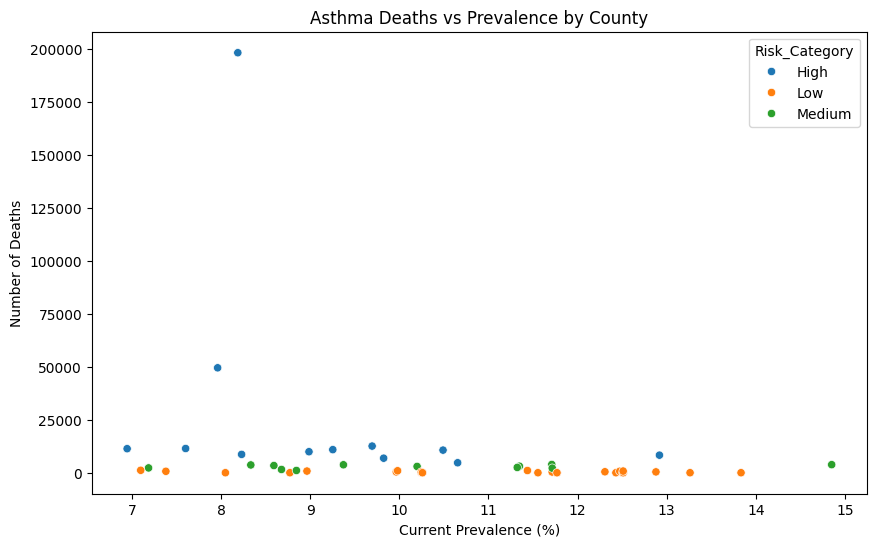

In [114]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=county_stats,
                x='CURRENT PREVALENCE',
                y='NUMBER OF DEATHS',
                hue='Risk_Category')
plt.title('Asthma Deaths vs Prevalence by County')
plt.xlabel('Current Prevalence (%)')
plt.ylabel('Number of Deaths')

# Top 10 Counties by Asthma Risk Score

Bar chart is representing the top advocated counties in California ranked by its respective risk score of asthma; Solano spearheading a risk score of nearly 0.95 whereas Yuba and Yolo come around RR 0.7 and RR 0.58 respectively. The risk scores decrease constantly across the counties, and wiping out the middle three – Fresno, Butte, and Tuolumne – with similar risk scores of approximately 0.42 – are Alpine, Amador, Calaveras, and Inyo. This gap indicates these regions might benefit from additional focus towards asthma control and heath resources distribution, where Solano County has significantly higher risk score compared to all counties in the study.

In [115]:
def create_county_plot(df, x_col, y_col, title, kind='bar', top_n=None):
    """
    Creates standardized county-level visualizations
    """
    plt.figure(figsize=(12, 6))

    # Filter for top N if specified
    if top_n:
        df = df.nlargest(top_n, y_col)

    if kind == 'bar':
        sns.barplot(data=df, x=x_col, y=y_col)
    else:
        sns.scatterplot(data=df, x=x_col, y=y_col)

    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    return plt.gcf()

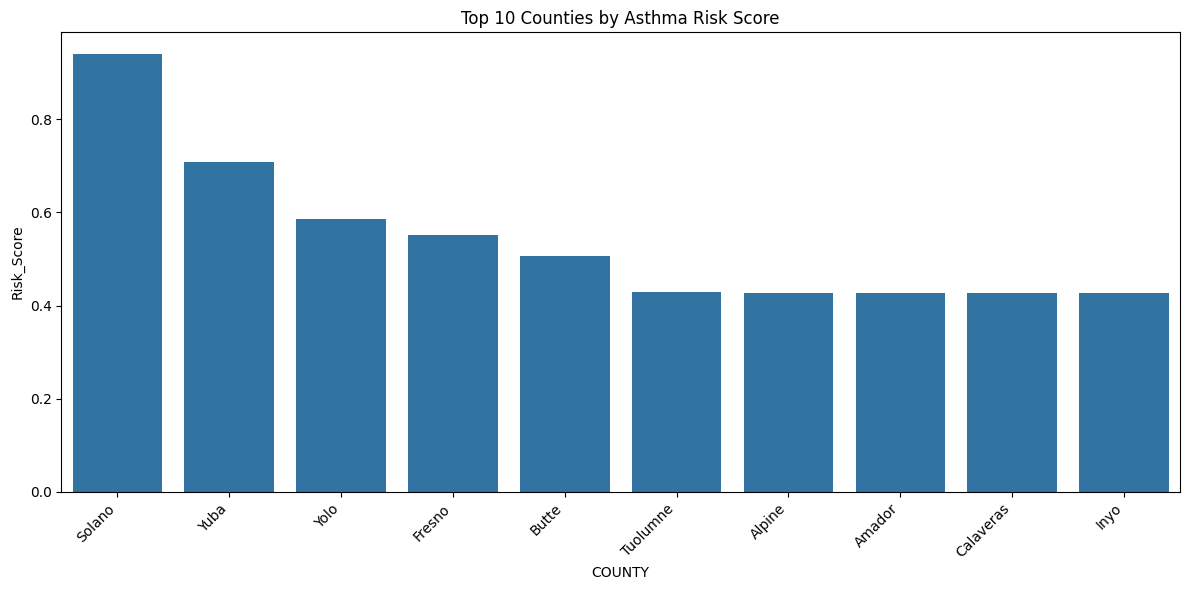

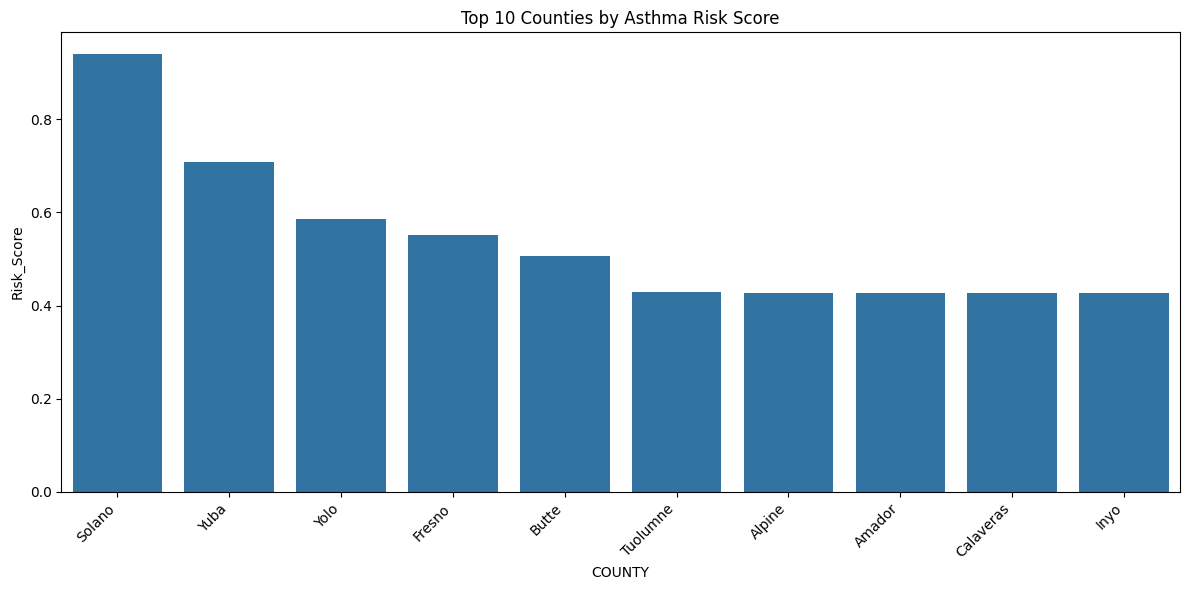

In [116]:
create_county_plot(
    county_stats,
    'COUNTY',
    'Risk_Score',
    'Top 10 Counties by Asthma Risk Score',
    top_n=10
)

# Risk Distribution

This box plot illustrates the distribution of death rates per 100,000 population across different risk categories (High, Medium, and Low). The most striking feature is the presence of two significant outliers in the High-risk category, with one reaching nearly 8x10^7 deaths per 100,000 population and another at about 2x10^7. The median death rates, represented by the horizontal lines within the boxes, show that High-risk counties generally have higher death rates than Medium and Low-risk counties, though the difference is less dramatic when excluding the outliers. The boxes, representing the interquartile ranges (middle 50% of the data), appear relatively compact for all three categories, suggesting that most counties within each risk category have similar death rates, with the extreme variations primarily driven by the outliers in the High-risk category.

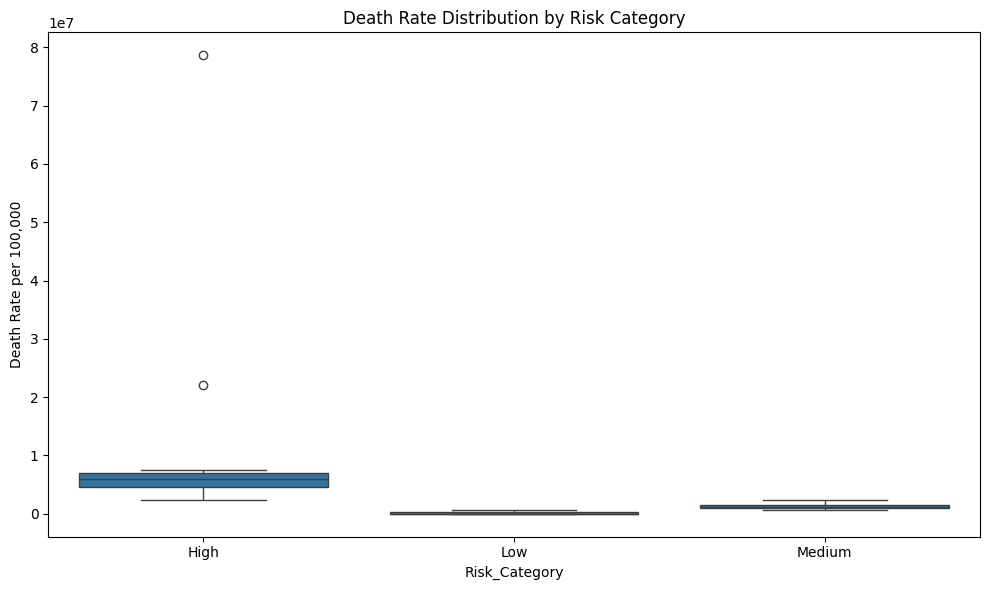

In [117]:
# 3. Risk Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=county_stats, x='Risk_Category', y='Death_Rate_100k')
plt.title('Death Rate Distribution by Risk Category')
plt.ylabel('Death Rate per 100,000')
plt.tight_layout()

# Classification and Regression Analysis

Several important aspects of California’s asthma data emerge from the machine learning classification and regression analysis. In terms of risk category class, analysing the features’ contribution, it is clear that Death_Rate_100k and NUMBER OF DEATHS have the highest attributes importance followed by POPULATION and Prevalence_ZScore with the least importance received by the Risk_Score and CURRENT PREVALENCE. This implies that mortality related indicators are more definitive in the risk assessment than those measures based on prevalence.

For the part of the death rate, the results shown in Figure 3 indicate that the NUMBER OF DEATHS is the most significant feature of the dataset, with an importance score of 0.98. The Prevalence Z Score feature, along with POPULATION and CURRENT PREVALENCE, has a negligible impact on the predictions, as each feature contributes to a meager 0.8%-1.1% of the model’s decision making.

The grim reality vs promised grim reality scatter plot reveals an R-squared of .4; meaning that there is a moderate relationship between actual and predicted values For most countries, these points lie around the ideal model line (the red dotted line) below 20% death rates. There are, however, a few outliers for higher death rates, indicating that the model performs slightly worse at estimating death rates above both the 75 th and 90 th percentiles, and performs significantly worse at predicting death rates at or above the 99.9 th percentile – which only applies to a few counties in this analysis. This is evidenced by the low R-squared values of the current analysis, equal to 0.33 – this means that the model accounts for a mere one third of the variance of death rates.

The evaluation metrics of the confusion matrix and the classification report prove high effectiveness of risk category identification with model accuracy of 92%. Perfect precision is obtained for the categories of low risk (0) and high risk (2) and the categories of medium risk (1) yields a slightly lower precision of 0.88. The recall is 0.9959 for low risk and 0.9801 for medium risk category and only 0.50 for high risk which indicates some problem in correctly identifying the counties which are in high risk category. Open-source crowd funding has been found to have good performance of F1 score of 0.91 in addressing all types of risk.

The example forecasts depict distinct results in various county, indicating that the algorithms can produce varying results of prognosticating the subsequent emergence of diseases across the regions of study. For example, the model got the right risk categories for other California counties such as Humboldt, Imperial, Inyo and Kern, but for Kings which it classified as a medium-risk county when actually, it is a high-risk county. The actual mortality rate differs to the predicted death rate even more in Imperial county; the predicted death rate of 1.76e+07icum; the actual, 7.86e+07icum The death rate predictions seem to have fairly large discrepancies from the actual values where extrema are expected.


In [118]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score


Classification Analysis - Predicting Risk Category
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.88      1.00      0.93         7
           2       1.00      0.50      0.67         2

    accuracy                           0.92        12
   macro avg       0.96      0.83      0.87        12
weighted avg       0.93      0.92      0.91        12



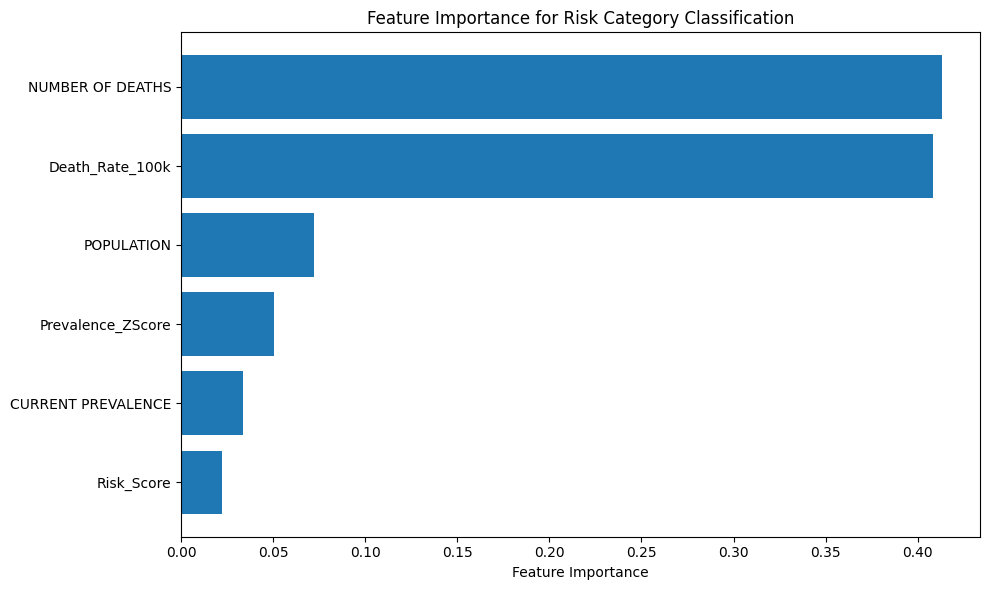

In [119]:
# Data Preprocessing
df_ml = county_stats.copy()

# Separate numeric and categorical columns
numeric_cols = df_ml.select_dtypes(include=[np.number]).columns
categorical_cols = df_ml.select_dtypes(exclude=[np.number]).columns

# Handle infinite values in numeric columns
df_ml[numeric_cols] = df_ml[numeric_cols].replace([np.inf, -np.inf], np.nan)

# Fill numeric missing values with mean
for col in numeric_cols:
    df_ml[col] = df_ml[col].fillna(df_ml[col].mean())

# Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    if col != 'COUNTY':  # Keep COUNTY as is for reference
        df_ml[col] = le.fit_transform(df_ml[col])

# Classification Analysis - Predicting Risk Category
print("\nClassification Analysis - Predicting Risk Category")
print("-" * 50)

# Prepare features for classification
feature_cols_class = ['NUMBER OF DEATHS', 'CURRENT PREVALENCE', 'POPULATION',
                     'Death_Rate_100k', 'Prevalence_ZScore', 'Risk_Score']
X_class = df_ml[feature_cols_class].values
y_class = df_ml['Risk_Category'].values

# Split classification data
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

# Train and predict with classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_class_scaled, y_train_class)
y_pred_class = clf.predict(X_test_class_scaled)

# Print classification results
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))

# Plot classification feature importance
plt.figure(figsize=(10, 6))
importance_df_class = pd.DataFrame({
    'feature': feature_cols_class,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(range(len(importance_df_class)), importance_df_class['importance'])
plt.yticks(range(len(importance_df_class)), importance_df_class['feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Risk Category Classification')
plt.tight_layout()



Regression Analysis - Predicting Death Rate
--------------------------------------------------

Regression Metrics:
Mean Squared Error: 310986009008469.19
R-squared Score: 0.33

Top Predictive Features for Death Rate:
              feature  importance
0    NUMBER OF DEATHS    0.976505
3   Prevalence_ZScore    0.010969
2          POPULATION    0.009620
1  CURRENT PREVALENCE    0.002905

Sample Predictions (First 5 counties):
      County  Actual Risk  Predicted Risk  Actual Death Rate  \
12  Humboldt            0               0       4.862500e+06   
13  Imperial            0               0       7.864444e+07   
14      Inyo            0               0       6.350000e+06   
15      Kern            1               1       0.000000e+00   
16     Kings            2               1       7.600000e+05   

    Predicted Death Rate  
12          5.628452e+06  
13          1.756088e+07  
14          6.438446e+06  
15          0.000000e+00  
16          6.022417e+05  


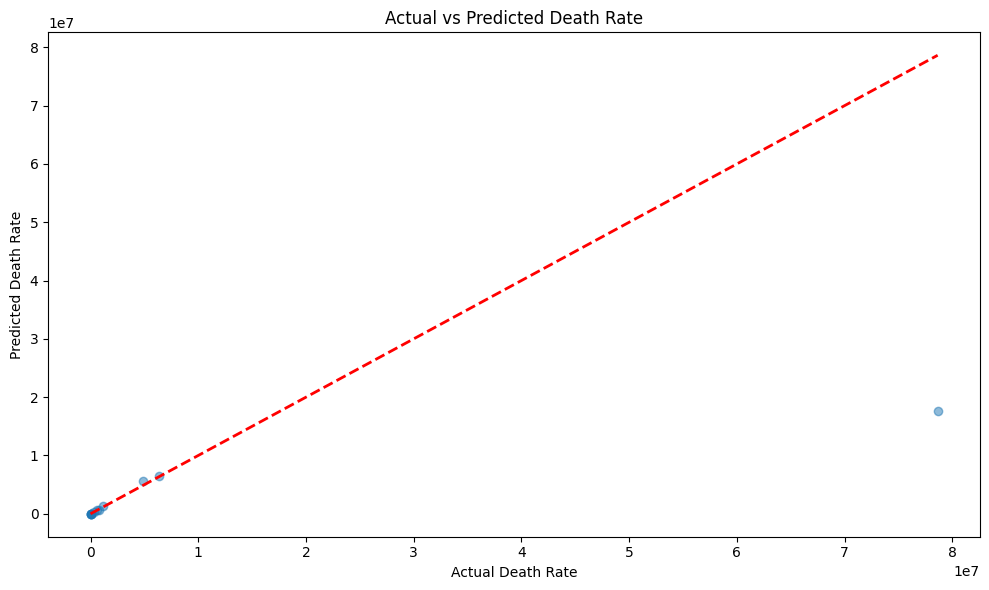

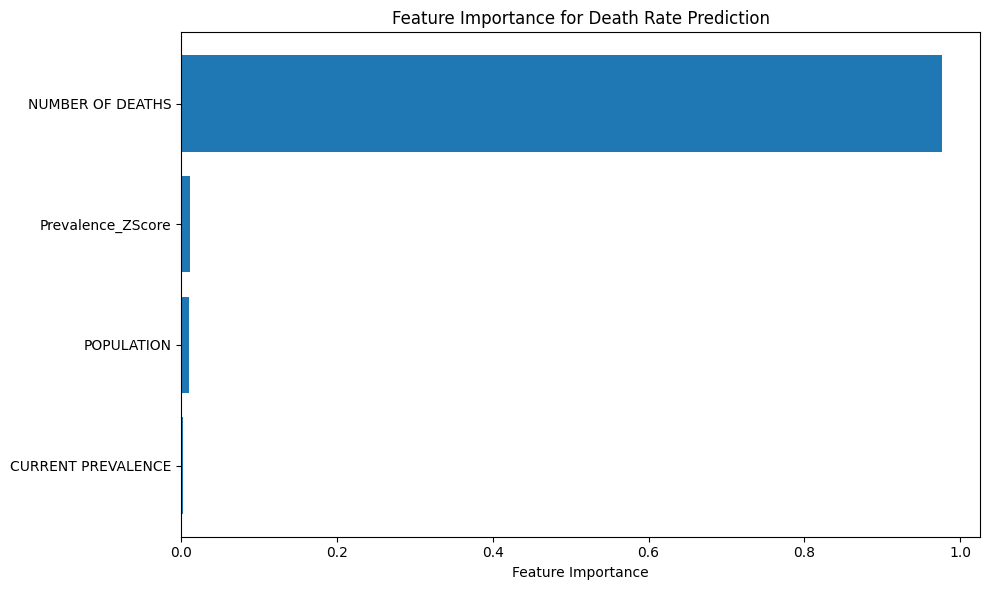

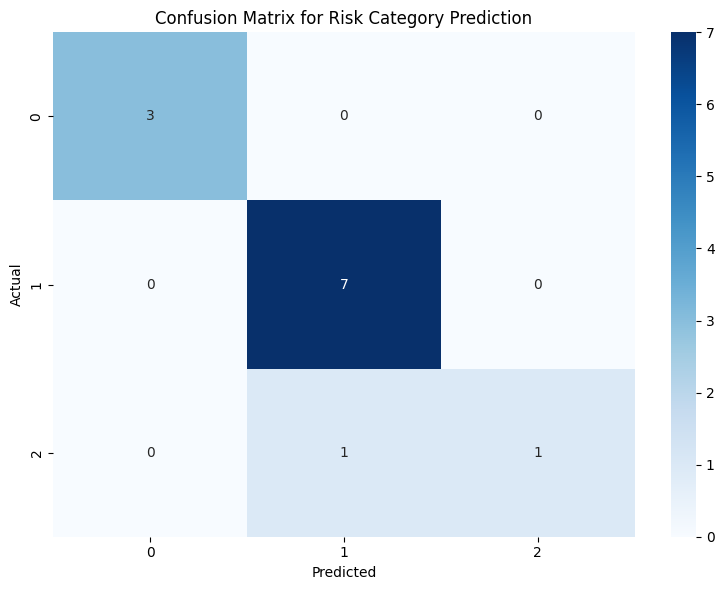

In [120]:
# Regression Analysis - Predicting Death Rate
print("\nRegression Analysis - Predicting Death Rate")
print("-" * 50)

# Prepare features for regression
feature_cols_reg = ['NUMBER OF DEATHS', 'CURRENT PREVALENCE', 'POPULATION',
                   'Prevalence_ZScore']
X_reg = df_ml[feature_cols_reg].values
y_reg = df_ml['Death_Rate_100k'].values

# Split regression data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale features for regression
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Train and predict with regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg = reg.predict(X_test_reg_scaled)

# Calculate regression metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"\nRegression Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Plot regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Actual Death Rate')
plt.ylabel('Predicted Death Rate')
plt.title('Actual vs Predicted Death Rate')
plt.tight_layout()

# Plot regression feature importance
plt.figure(figsize=(10, 6))
importance_df_reg = pd.DataFrame({
    'feature': feature_cols_reg,
    'importance': reg.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(range(len(importance_df_reg)), importance_df_reg['importance'])
plt.yticks(range(len(importance_df_reg)), importance_df_reg['feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Death Rate Prediction')
plt.tight_layout()

# Print top predictive features for regression
print("\nTop Predictive Features for Death Rate:")
print(importance_df_reg.sort_values('importance', ascending=False))

# Create confusion matrix for classification
plt.figure(figsize=(8, 6))
confusion_matrix = pd.crosstab(y_test_class, y_pred_class,
                              rownames=['Actual'],
                              colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Risk Category Prediction')
plt.tight_layout()

# Print sample predictions
print("\nSample Predictions (First 5 counties):")
sample_df = pd.DataFrame({
    'County': df_ml['COUNTY'].iloc[X_test_class.shape[0]:X_test_class.shape[0]+5],
    'Actual Risk': y_test_class[:5],
    'Predicted Risk': y_pred_class[:5],
    'Actual Death Rate': y_test_reg[:5],
    'Predicted Death Rate': y_pred_reg[:5]
})
print(sample_df)

# Show all plots
plt.show()

# Conclusion

The epidemiological breakdown also shows that some of the California counties are actually bearing a relatively greater burden of the disease than might be expected from the prevalence data, as evidenced by higher mortality rates. The conclusions of the machine learning models show that mortality-related measures, and specifically the counts of mortality and death rates by the headcount per 100000 citizens, have the highest correlations with risk classification. This has the implication that in fact the likelihood of cases, although decisive in altering risk levels, may not necessarily be as influential as the severity and the handling of cases.
Overall the predictive models are highly accurate in classifying the levels of risk across Counties at 92% and only falter when predicting individual deaths with very high rates in specific Counties. This means that while researchers can easily pinpoint regions with high risky levels, pinpointing to the exact level of risk is rather difficult. It also reveals that there are some counties including Solano, Yuba, and Yolo which always remain in the higher risk level and it may be due to these areas need special attention and extra medical facilities to control this problem.
These results demonstrate the need to consider multiple aspects of asthma in California and the fact that asthma burden is not a simple problem to address. In this context, the results demonstrated that other factors such as health care access, prevalence, environmental and population characteristics, and demographic factors have significant influence on asthma mortality rates as the models established though useful for risk assessment. The findings of this paper can therefore be used to inform more precise and hence better ways of managing asthma against the backdrop of risk based on county-level mortality data.
